In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [37]:
data=pd.read_csv('C:\XTX Challenge\data-training\data-training.csv')
data=data.fillna(0)
data=data.iloc[12:,:]
data['askrate_max']=data.iloc[:,0:15].max(axis=1,skipna=True)
data['askrate_min']=data.iloc[:,0:15].min(axis=1,skipna=True)
data['bidrate_max']=data.iloc[:,30:45].max(axis=1,skipna=True)
data['bidrate_min']=data.iloc[:,30:45].min(axis=1,skipna=True)
data['asksize_max']=data.iloc[:,15:30].max(axis=1,skipna=True)
data['asksize_min']=data.iloc[:,15:30].min(axis=1,skipna=True)
data['bidsize_max']=data.iloc[:,45:60].max(axis=1,skipna=True)
data['bidsize_min']=data.iloc[:,45:60].min(axis=1,skipna=True)
data['sumasksize']=data.iloc[:,15:30].sum(axis=1)
data['sumbidsize']=data.iloc[:,45:60].sum(axis=1)
data['spread']=data['asksize_min']-data['bidsize_max']
data['askrate_dif']=data['asksize_max']-data['asksize_min']
data['bidrate_dif']=data['bidsize_max']-data['bidsize_min']


In [38]:
data['w_ask']=np.sum(np.multiply(data.iloc[:,0:15],data.iloc[:,15:30]),axis=1)/data['sumasksize']
data['w_bid']=np.sum(np.multiply(data.iloc[:,30:45],data.iloc[:,45:60]),axis=1)/data['sumbidsize']
data['skew_ask']=data.iloc[:,15:30].skew(axis=1)
data['skew_bid']=data.iloc[:,45:60].skew(axis=1)

In [39]:
lvl=0.1

In [40]:
data['y_lag']=data['y'].shift(1)
data['y_lag2']=data['y'].shift(2)
data['y_lag3']=data['y'].shift(3)
data['y_lag4']=data['y'].shift(4)



In [41]:
data2=data.diff()

In [42]:
data2.loc[(data2['y']>-lvl) & (data2['y']<lvl),'dummy_y']=1
data2.loc[(data2['y']<=-lvl) | (data2['y']>=lvl),'dummy_y']=0
data2['mult']=data2['y_lag']*data2['dummy_y']
data2['mult2']=data2['y_lag2']*data2['dummy_y']
data2['mult3']=data2['y_lag3']*data2['dummy_y']
data2['mult4']=data2['y_lag4']*data2['dummy_y']

In [43]:
#corr_table=data2.corr()

In [44]:
#corr_table.to_excel('covariance matrix.xlsx')

In [45]:
data2=data2.iloc[10:,:]

In [46]:
X=data2[['askRate0','bidRate0']]
y=data2['y']
X=sm.add_constant(X)
model=ols('y~askRate0+bidRate0',data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.492e+06
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:32   Log-Likelihood:             2.9054e+06
No. Observations:             2999977   AIC:                        -5.811e+06
Df Residuals:                 2999974   BIC:                        -5.811e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.103e-05    5.3e-05     -0.208      0.835      -0.000    9.29e-05
askRate0      -0.4958      0.000  -1121.202      0.000      -0.497      -0.495
bidRate0      -0.4998      0.000  -1085.502      0.000      -0.501      -0.499
==============================================================================
Omnibus:                  1215916.114   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        944492130.870
Skew:                          -0.423   Prob(JB):                         0.00
Kurtosis:                      89.921   Cond. No.                         9.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
y_hat=model.predict(X)
round(y_hat*4)/4

22        -0.00
23        -0.00
24        -0.00
25        -0.00
26        -0.00
27        -0.00
28        -0.00
29        -0.00
30        -0.00
31         0.25
32        -0.00
33        -0.25
34        -0.00
35        -0.00
36        -0.00
37        -0.00
38        -0.00
39        -0.00
40        -0.00
41        -0.00
42        -0.00
43        -0.00
44        -0.00
45        -0.00
46        -0.00
47        -0.00
48        -0.00
49        -0.25
50        -0.00
51        -0.00
           ... 
2999969   -0.00
2999970   -0.00
2999971   -0.00
2999972   -0.00
2999973   -0.00
2999974   -0.00
2999975   -0.00
2999976   -0.00
2999977   -0.00
2999978   -0.00
2999979   -0.00
2999980   -0.00
2999981   -0.00
2999982   -0.00
2999983   -0.00
2999984   -0.00
2999985   -0.00
2999986   -0.00
2999987   -0.00
2999988   -0.00
2999989   -0.00
2999990   -0.00
2999991   -0.00
2999992   -0.00
2999993   -0.00
2999994   -0.00
2999995   -0.00
2999996   -0.00
2999997   -0.00
2999998   -0.00
Length: 2999977, dtype: 

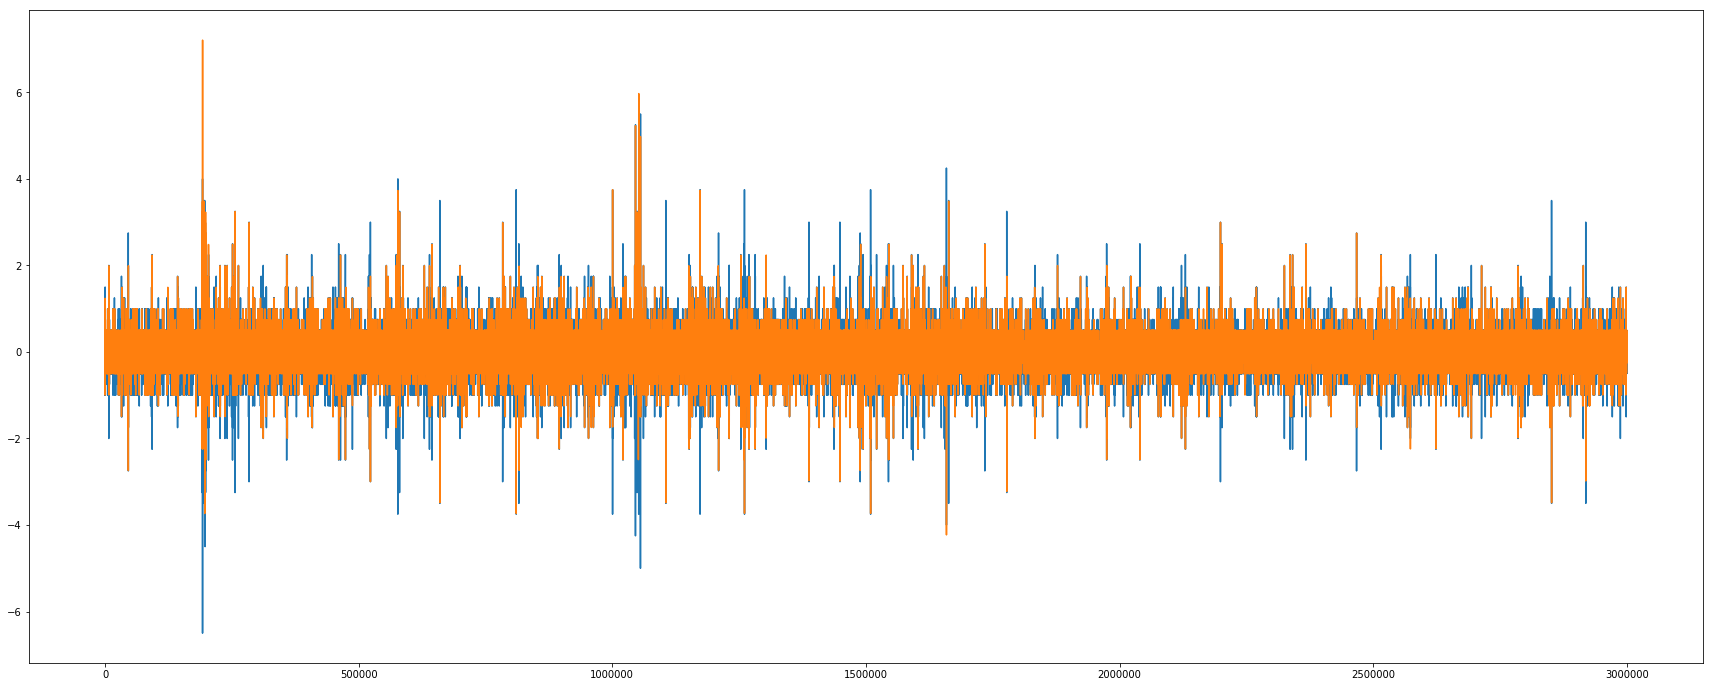

In [48]:
plt.figure(figsize=(30, 12),)
plt.plot(data2['y'])
plt.plot(y_hat)



In [49]:
data2['y_hat']=model.predict(X)
data2['resid']=data2['y']-y_hat
data2['sq_resid']=data2['resid']**2
data2['sq_y']=data2['y']**2
1-data2['sq_resid'].sum()/data2['sq_y'].sum()

0.4987392809194331

In [50]:
data2['y_hat']=model.predict(X)
data2['resid']=data2['y']-data2['y_hat']
data2['sq_resid']=data2['resid']**2
data2['sq_y']=data2['y']**2
1-data2['sq_resid'].sum()/data2['sq_y'].sum()

0.4987392809194331

In [51]:
data2.iloc[:,55:]

,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y,askrate_max,askrate_min,bidrate_max,bidrate_min,...,y_lag4,dummy_y,mult,mult2,mult3,mult4,y_hat,resid,sq_resid,sq_y
22,18.0,-25.0,16.0,-3.0,-21.0,0.00,0.0,0.0,0.0,1.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
23,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
24,0.0,0.0,0.0,0.0,0.0,0.00,-0.5,0.0,0.0,0.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
25,-18.0,18.0,-25.0,16.0,-3.0,0.00,0.0,0.0,0.0,1.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
26,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
27,0.0,-18.0,18.0,-25.0,16.0,0.00,0.0,0.0,0.0,1.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
28,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
29,0.0,0.0,0.0,0.0,0.0,0.00,-0.5,0.0,0.0,0.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
30,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,1.0,0.00,0.00,0.00,0.00,-0.000011,0.000011,1.216839e-10,0.0000
31,0.0,0.0,0.0,0.0,0.0,0.25,-1.0,-0.5,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.247913,0.002087,4.357386e-06,0.0625


In [52]:
max(data2['dummy_y'])

1.0

In [53]:
data2['y_lag']

22         0.00
23         0.00
24         0.00
25         0.00
26         0.00
27         0.00
28         0.00
29         0.00
30         0.00
31         0.00
32         0.25
33         0.00
34        -0.25
35         0.00
36         0.00
37         0.00
38        -0.25
39         0.25
40        -0.75
41        -0.25
42         0.00
43         0.00
44         0.00
45         0.00
46         0.50
47        -0.75
48         0.75
49        -0.25
50        -0.25
51         0.00
           ... 
2999969    0.00
2999970    0.00
2999971    0.00
2999972    0.00
2999973    0.00
2999974    0.00
2999975    0.00
2999976    0.00
2999977    0.00
2999978    0.00
2999979    0.00
2999980    0.00
2999981    0.00
2999982    0.00
2999983    0.00
2999984    0.00
2999985    0.00
2999986    0.00
2999987    0.00
2999988    0.00
2999989    0.00
2999990    0.00
2999991    0.00
2999992    0.00
2999993    0.00
2999994    0.00
2999995    0.00
2999996    0.00
2999997    0.00
2999998    0.00
Name: y_lag, Length: 299

In [54]:
data3=data.shift()

In [55]:
X=data2[['askRate0','bidRate0','mult']]
y=data2['y']
X=sm.add_constant(X)
model=ols('y~askRate0+bidRate0',data=data3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     457.8
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          1.67e-199
Time:                        23:26:51   Log-Likelihood:            -3.2228e+06
No. Observations:             2999986   AIC:                         6.446e+06
Df Residuals:                 2999983   BIC:                         6.446e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4838      0.025     19.351      0.000       0.435       0.533
askRate0      -0.0277      0.001    -23.223      0.000      -0.030      -0.025
bidRate0       0.0274      0.001     22.974      0.000       0.025       0.030
==============================================================================
Omnibus:                   159590.977   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           635762.784
Skew:                          -0.060   Prob(JB):                         0.00
Kurtosis:                       5.252   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
data2['y2']=data2['y'].shift(1)

In [81]:
data2['y'].corr(data2['y2'])

-0.04180653942910422

In [56]:
y=data2['y']
model = sm.tsa.ARIMA(y, (1, 0, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:              2999977
Model:                     ARMA(1, 0)   Log Likelihood             1872049.027
Method:                       css-mle   S.D. of innovations              0.130
Date:                Mon, 30 Sep 2019   AIC                       -3744092.054
Time:                        23:27:10   BIC                       -3744053.311
Sample:                             0   HQIC                      -3744081.840
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.468e-07   7.18e-05      0.003      0.997      -0.000       0.000
ar.L1.y       -0.0418      0.001    -72.474      0.000      -0.043      -0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -23.9197           +0.0000j           23.9197            0.5000
-----------------------------------------------------------------------------
"""

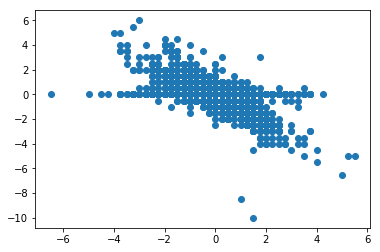

In [57]:
plt.scatter(data2['y'],data2['askRate0'])

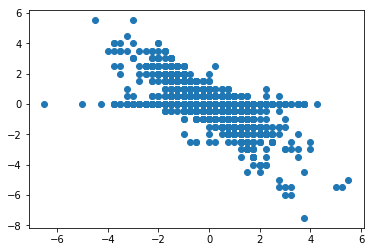

In [58]:
plt.scatter(data2['y'],data2['bidRate0'])

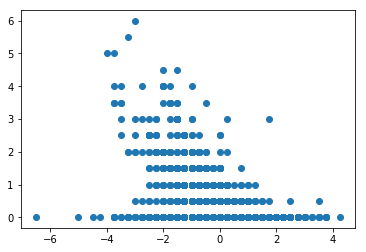

In [59]:
plt.scatter(data2[data2['askRate0']>=0]['y'],data2[data2['askRate0']>=0]['askRate0'])

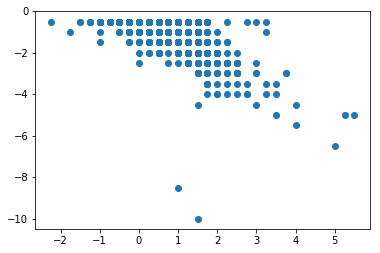

In [101]:
plt.scatter(data2[data2['askRate0']<0]['y'],data2[data2['askRate0']<0]['askRate0'])

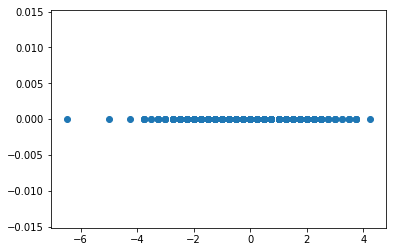

In [177]:
plt.scatter(data2[data2['bidRate0']==0]['y'],data2[data2['bidRate0']==0]['bidRate0'])

In [179]:
plt.scatter(data2[data2[['bidRate0']==0]&['askRate0']==0]['y'],data2[data2[['bidRate0']==0]&['askRate0']==0])

KeyError: False

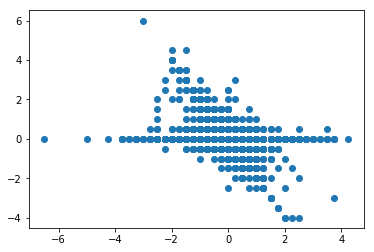

In [178]:
plt.scatter(data2[data2['bidRate0']==0]['y'],data2[data2['bidRate0']==0]['askRate0'])

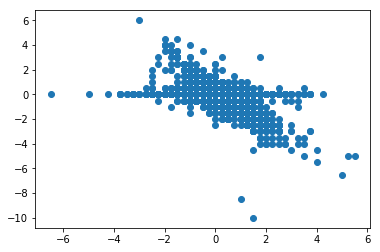

In [64]:
plt.scatter(data2[data2['bidRate0']<=0]['y'],data2[data2['bidRate0']<=0]['askRate0'])

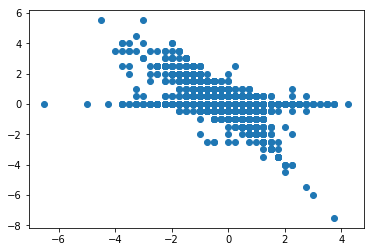

In [65]:
plt.scatter(data2[data2['askRate0']>=0]['y'],data2[data2['askRate0']>=0]['bidRate0'])

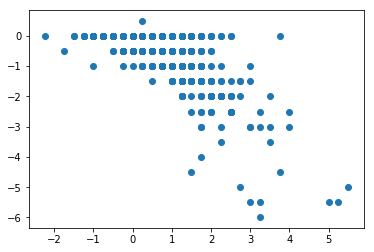

In [100]:
plt.scatter(data2[data2['askRate0']<0]['y'],data2[data2['askRate0']<0]['bidRate0'])

In [156]:
data_ask_l0=data2[data2['askRate0']<0]

In [166]:
#plt.scatter(data2[data2['askRate0']<=0]['y'],data2[data2['askRate0']<=0]['askRate0'])
y=data2[data2['askRate0']<0]['y']
x=data2[data2['askRate0']<0]['askRate0']
model=ols('y~bidRate0+np.power(askRate0, 2)+askRate0',data=data_ask_l0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 5.668e+04
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:10:01   Log-Likelihood:                 58299.
No. Observations:               71249   AIC:                        -1.166e+05
Df Residuals:                   71245   BIC:                        -1.166e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0473      0.002    -24.548      0.000      -0.051      -0.044
bidRate0                 -0.4973      0.002   -240.247      0.000      -0.501      -0.493
np.power(askRate0, 2)    -0.0532      0.001    -52.456      0.000      -0.055      -0.051
askRate0                 -0.6189      0.004   -151.271      0.000      -0.627      -0.611
==============================================================================
Omnibus:                    26800.523   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5705427.399
Skew:                          -0.640   Prob(JB):                         0.00
Kurtosis:                      46.820   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
data_ask_l1=data2[data2['bidRate0']<0]

In [155]:
#plt.scatter(data2[data2['bidRate0']<=0]['y'],data2[data2['bidRate0']<=0]['bidRate0'])
#plt.scatter(data2[data2['askRate0']<=0]['y'],data2[data2['askRate0']<=0]['askRate0'])
y=data2[data2['askRate0']<0]['y']
x=data2[data2['askRate0']<0]['askRate0']
model=ols('y~bidRate0+askRate0',data=data_ask_l1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 8.574e+04
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:08:34   Log-Likelihood:                 52619.
No. Observations:               65741   AIC:                        -1.052e+05
Df Residuals:                   65738   BIC:                        -1.052e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0064      0.001      4.777      0.000       0.004       0.009
bidRate0      -0.4913      0.002   -201.161      0.000      -0.496      -0.486
askRate0      -0.4756      0.002   -303.129      0.000      -0.479      -0.472
==============================================================================
Omnibus:                    55901.743   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         65250878.757
Skew:                          -2.848   Prob(JB):                         0.00
Kurtosis:                     157.236   Cond. No.                         7.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
data_ask_h1=data2[data2['bidRate0']>0]

In [150]:
#plt.scatter(data2[data2['bidRate0']<=0]['y'],data2[data2['bidRate0']<=0]['bidRate0'])
#plt.scatter(data2[data2['askRate0']<=0]['y'],data2[data2['askRate0']<=0]['askRate0'])
y=data2[data2['askRate0']<0]['y']
x=data2[data2['askRate0']<0]['askRate0']
model=ols('y~bidRate0+askRate0',data=data_ask_h1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                 7.347e+04
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:08:09   Log-Likelihood:                 52419.
No. Observations:               65752   AIC:                        -1.048e+05
Df Residuals:                   65749   BIC:                        -1.048e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.002      1.272      0.203      -0.001       0.005
bidRate0      -0.5039      0.003   -177.424      0.000      -0.509      -0.498
askRate0      -0.5007      0.002   -224.950      0.000      -0.505      -0.496
==============================================================================
Omnibus:                    23722.239   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11331114.032
Skew:                           0.220   Prob(JB):                         0.00
Kurtosis:                      67.310   Cond. No.                         9.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
data_ask_h1=data2[data2['askRate0']>0]

In [173]:
#plt.scatter(data2[data2['bidRate0']<=0]['y'],data2[data2['bidRate0']<=0]['bidRate0'])
#plt.scatter(data2[data2['askRate0']<=0]['y'],data2[data2['askRate0']<=0]['askRate0'])
y=data2[data2['askRate0']<0]['y']
x=data2[data2['askRate0']<0]['askRate0']
model=ols('y~bidRate0+askRate0',data=data_ask_h1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                 8.115e+04
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:11:31   Log-Likelihood:                 57264.
No. Observations:               71581   AIC:                        -1.145e+05
Df Residuals:                   71578   BIC:                        -1.145e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0047      0.001     -3.513      0.000      -0.007      -0.002
bidRate0      -0.5026      0.002   -305.324      0.000      -0.506      -0.499
askRate0      -0.4895      0.002   -198.532      0.000      -0.494      -0.485
==============================================================================
Omnibus:                    29779.144   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13957449.608
Skew:                           0.641   Prob(JB):                         0.00
Kurtosis:                      71.396   Cond. No.                         7.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""